## Importing Dataset and libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('udemy_courses.csv')
df=df.drop_duplicates()
df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1282064,Cryptocurrency (BTC & ETH) Investment & Tradin...,https://www.udemy.com/cryptocurrency-btc-eth-i...,True,20,0,0,7,Beginner Level,2.5,2017-07-06T21:46:30Z,Business Finance
1,1187084,Forex how traders beat the markest with little...,https://www.udemy.com/forex-how-traders-beat-t...,True,100,0,0,16,All Levels,1.0,2017-07-06T21:16:13Z,Business Finance
2,1268616,Condor Broken Wing Butterfly Options Trading C...,https://www.udemy.com/condor-broken-wing-butte...,False,0,16,0,15,All Levels,1.5,2017-07-06T19:47:16Z,Business Finance


In [3]:
df['date']=pd.to_datetime(df.published_timestamp).dt.date
df['month_p']=pd.DatetimeIndex(df.date).month
df['year_p']=pd.DatetimeIndex(df.date).year
df.head(2)


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,date,month_p,year_p
0,1282064,Cryptocurrency (BTC & ETH) Investment & Tradin...,https://www.udemy.com/cryptocurrency-btc-eth-i...,True,20,0,0,7,Beginner Level,2.5,2017-07-06T21:46:30Z,Business Finance,2017-07-06,7,2017
1,1187084,Forex how traders beat the markest with little...,https://www.udemy.com/forex-how-traders-beat-t...,True,100,0,0,16,All Levels,1.0,2017-07-06T21:16:13Z,Business Finance,2017-07-06,7,2017


## Exploring data

In [4]:
df.shape

(3672, 15)

In [5]:
df.course_id=df.course_id.astype('category')
df.month_p=df.month_p.astype('category')
df.year_p=df.year_p.astype('category')

In [6]:
df.describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,66.102941,3190.586874,156.371460,40.140251,4.097603
std,61.035920,9488.105448,936.178649,50.417102,6.057830
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,111.750000,4.000000,15.000000,1.000000
50%,45.000000,912.000000,18.000000,25.000000,2.000000
75%,95.000000,2548.750000,67.000000,46.000000,4.500000
max,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [8]:
We have some courses with 0 subscribers and 0 reviews.
Sum courses are free.

SyntaxError: invalid syntax (<ipython-input-8-59279a8bffe5>, line 1)

In [ ]:
df.info()  #implies no null object is present in data

In [ ]:
df.level.value_counts()

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

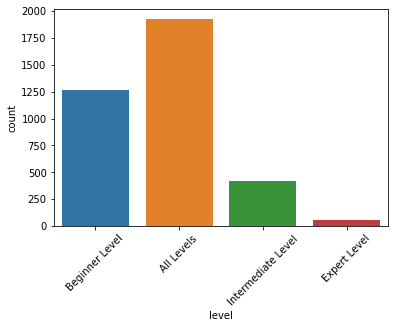

In [9]:
sns.countplot(df.level)
plt.xticks(rotation=45)

In [10]:
df.subject.value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

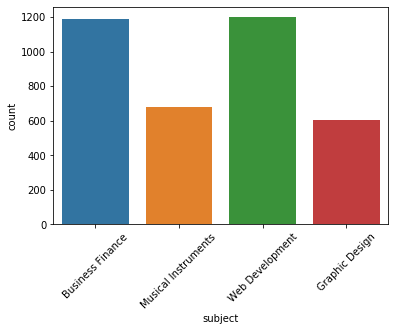

In [11]:
sns.countplot(df.subject)
plt.xticks(rotation=45)

In [12]:
rr=pd.crosstab(df.level,df.subject)
rr

subject,Business Finance,Graphic Design,Musical Instruments,Web Development
level,,,,
All Levels,693,298,276,658
Beginner Level,339,242,296,391
Expert Level,31,5,7,15
Intermediate Level,128,57,101,135


In [13]:
##business Finance and Web development courses are the most preferred ones for all levels.

In [14]:
df[df.price==0].shape

(310, 15)

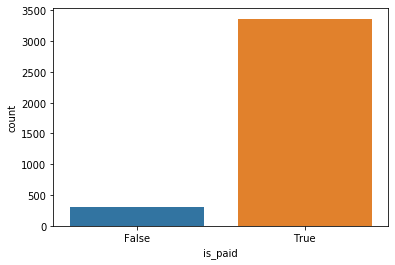

In [15]:
sns.countplot(data=df,x='is_paid')
plt.show()

In [16]:
df.month_p.value_counts()

5     375
3     364
4     355
6     349
2     339
11    298
1     292
10    286
7     277
8     254
12    244
9     239
Name: month_p, dtype: int64

In [17]:
df.year_p.value_counts()

2016    1204
2015    1014
2017     713
2014     490
2013     201
2012      45
2011       5
Name: year_p, dtype: int64

Text(0.5, 1.0, 'Published Year')

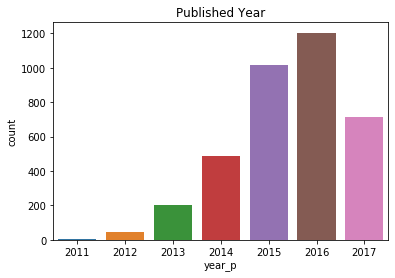

In [18]:
sns.countplot(df.year_p).set_title('Published Year')

Text(0.5, 1.0, 'Published month')

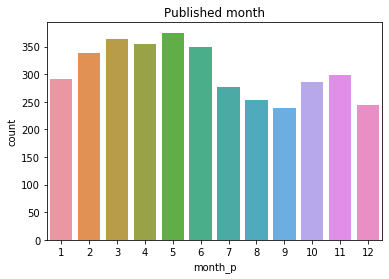

In [19]:
sns.countplot(df.month_p).set_title('Published month')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

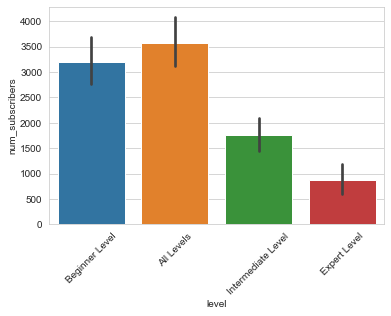

In [20]:
sns.set_style("whitegrid")
sns.barplot(x=df.level,y=df.num_subscribers)
plt.xticks(rotation=45)

In [21]:
x=pd.crosstab(df.subject,df.is_paid)
x.apply(lambda x:x/x.sum(),axis=1)

is_paid,False,True
subject,,
Business Finance,0.080605,0.919395
Graphic Design,0.058140,0.941860
Musical Instruments,0.067647,0.932353
Web Development,0.110926,0.889074


In [22]:
x=pd.crosstab(df.subject,df.is_paid)
x.apply(lambda x:x/x.sum(),axis=0)

is_paid,False,True
subject,,
Business Finance,0.309677,0.325699
Graphic Design,0.112903,0.168650
Musical Instruments,0.148387,0.188578
Web Development,0.429032,0.317073


In [23]:
df.groupby('is_paid').content_duration.mean()

is_paid
False    2.210753
True     4.271584
Name: content_duration, dtype: float64

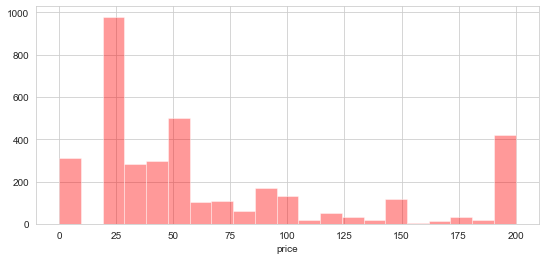

In [24]:
plt.figure(figsize = (9,4))
sns.distplot(df.price, kde = False,color='red')
plt.show()

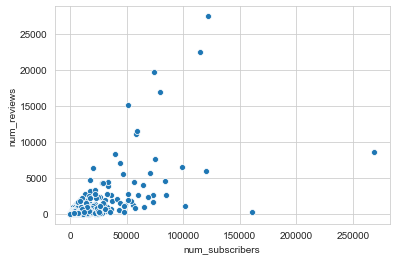

In [25]:
sns.scatterplot(x='num_subscribers',y='num_reviews',data=df)

In [26]:
df.num_reviews.describe()

count     3672.000000
mean       156.371460
std        936.178649
min          0.000000
25%          4.000000
50%         18.000000
75%         67.000000
max      27445.000000
Name: num_reviews, dtype: float64

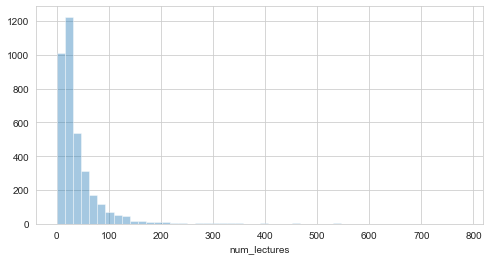

In [27]:
plt.figure(figsize = (8,4))
sns.distplot(df.num_lectures, kde = False)
plt.show()

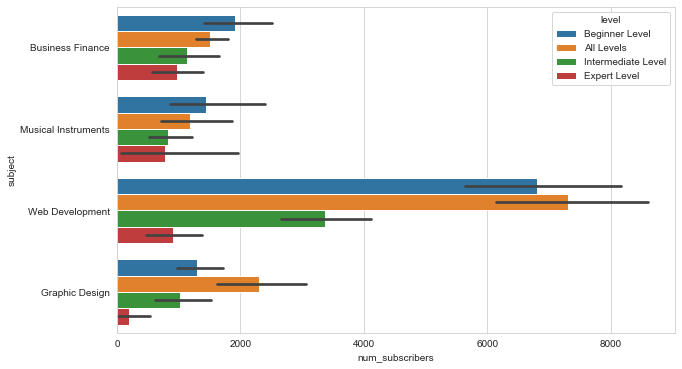

In [28]:
plt.figure(figsize=(10,6))
#sns.barplot(data=df ,x='num_subscribers',y='subject',hue='level',dodge=True)
sns.barplot(data = df, x = 'num_subscribers', y = 'subject',hue='level')

plt.show()

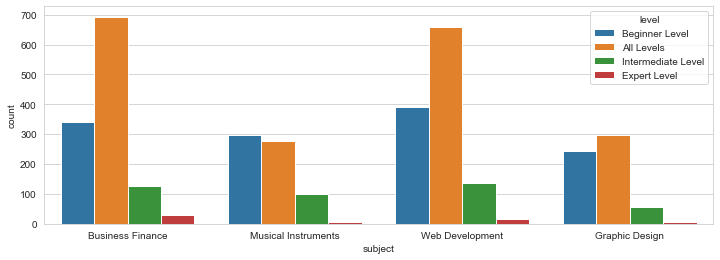

In [29]:
plt.figure(figsize = (12,4))
sns.countplot(data = df, x = 'subject', hue = 'level')
plt.show()

<Figure size 720x288 with 0 Axes>

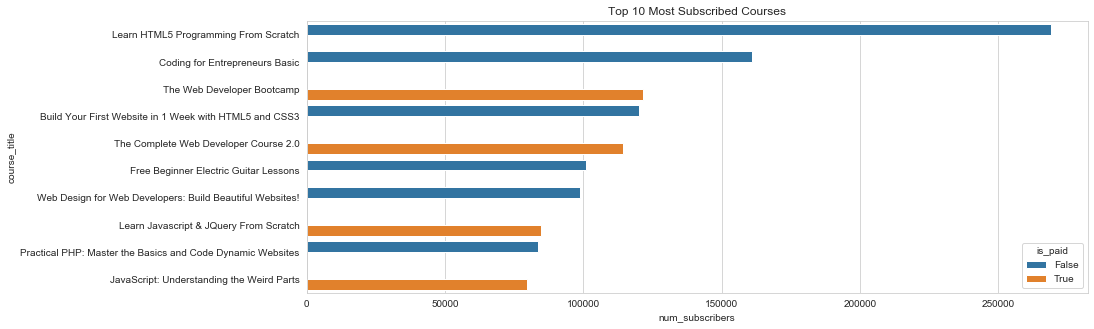

In [30]:
rr=df.nlargest(10, 'num_subscribers')
plt.figure(figsize = (10, 4))
plt.figure(figsize=(14,5))
sns.barplot(data = rr, 
            x = 'num_subscribers', y = 'course_title',hue='is_paid')
plt.title(label = "Top 10 Most Subscribed Courses")
plt.show()

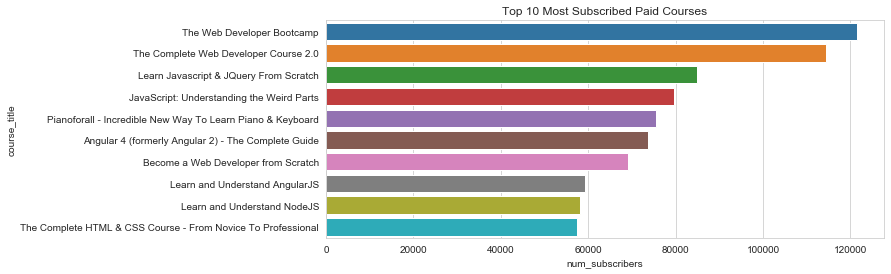

In [31]:
rr=df[df['is_paid'] == True].nlargest(10, 'num_subscribers')
plt.figure(figsize = (10, 4))
sns.barplot(data = rr, 
            x = 'num_subscribers', y = 'course_title')
plt.title(label = "Top 10 Most Subscribed Paid Courses")
plt.show()

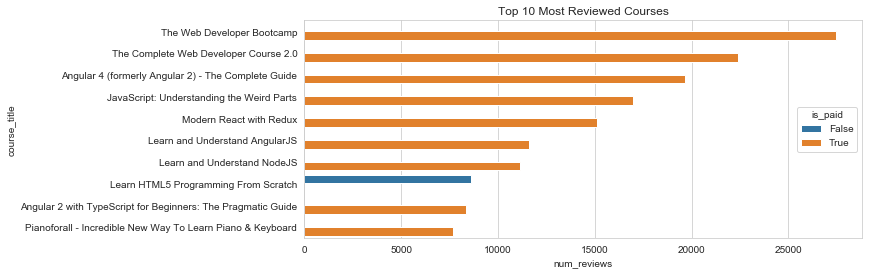

In [32]:
plt.figure(figsize = (10, 4))
sns.barplot(data = df.nlargest(10, 'num_reviews'), 
            x = 'num_reviews', y = 'course_title',hue='is_paid')
plt.title(label = "Top 10 Most Reviewed Courses")
plt.show()

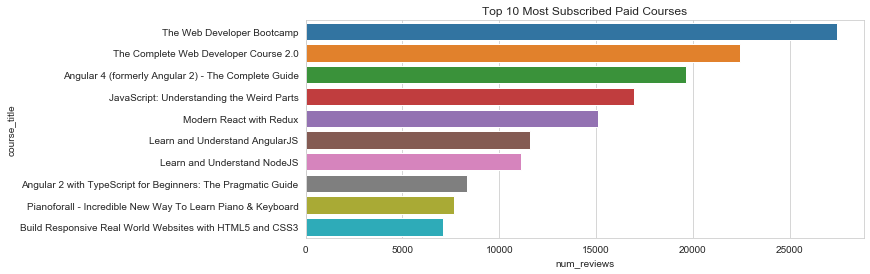

In [33]:
rr=df[df['is_paid'] == True].nlargest(10, 'num_reviews')
plt.figure(figsize = (10, 4))
sns.barplot(data = rr, 
            x = 'num_reviews', y = 'course_title')
plt.title(label = "Top 10 Most Subscribed Paid Courses")
plt.show()

In [34]:
## Web Development courses are the most famous courses with highest number of subscribers

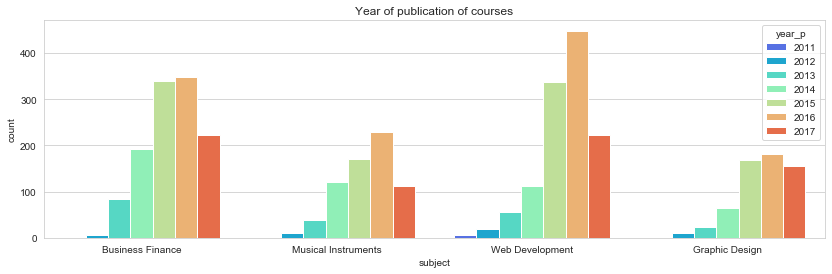

In [35]:
plt.figure(figsize = (14,4))
sns.countplot(data =df, x = 'subject', hue = 'year_p',palette='rainbow').set_title('Year of publication of courses')
plt.show()

In [36]:
df.corr()

,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,1.000000,0.328910,-0.267056,-0.087445,0.112788,0.094594
price,0.328910,1.000000,0.050436,0.113568,0.329944,0.293200
num_subscribers,-0.267056,0.050436,1.000000,0.651070,0.158351,0.162118
num_reviews,-0.087445,0.113568,0.651070,1.000000,0.243019,0.228852
num_lectures,0.112788,0.329944,0.158351,0.243019,1.000000,0.801624
content_duration,0.094594,0.293200,0.162118,0.228852,0.801624,1.000000


In [37]:
--negative correlation between is_paid and num_subscribers,reviews

SyntaxError: invalid syntax (<ipython-input-37-8e4e4f7290ed>, line 1)

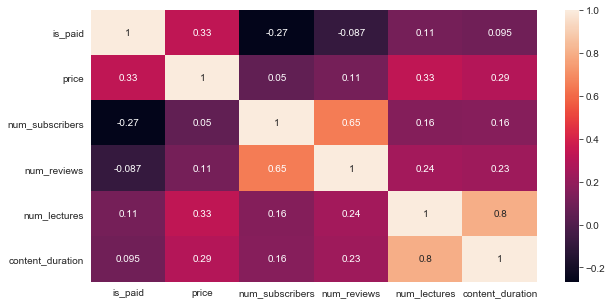

In [38]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

Insights:

1. People prefer All Level and Beginner courses. Expert level courses are preferred by a handfull of them. 
2. Web Development And business finance are almost equally preferred and have great popularity for all the levels.
3. Maximum courses were published in 2016 followed by 2015. Courses published decreased for 2017
   More courses are published generally in the earlier months of the year.
4. All Level and Beginner level courses have huge number of subscribers
  One reason for less no of subscribers for Graphic Design and Musical instruments may be that most of these courses are paid.
5. Paid Courses have a more duration of about 4.3 hours in comparison to unpaid courses.
6. The courses with highest subscription count are programming courses. 
   Out of the top 10 subscribed courses, 4 are paid courses and 6 are free courses.
   The courses with more reviews are programming courses. Out of the top 10 reviewed courses, 9 are paid courses and 1 is free course. 
   It shows that the paid courses have more enegagement from the subjects.

## Analysing Unsubscribed and Unreviewed data

In [39]:
df[df.num_subscribers==0].shape

(65, 15)

In [40]:
df[df.num_reviews==0].shape

(284, 15)

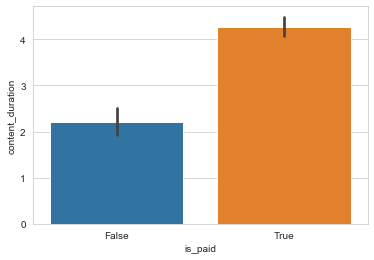

In [41]:
sns.barplot(df.is_paid,df.content_duration	)

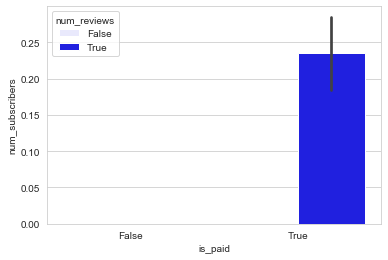

In [42]:
sns.barplot(df.is_paid,df.num_subscribers==0,hue=df.num_reviews==0,color='blue')

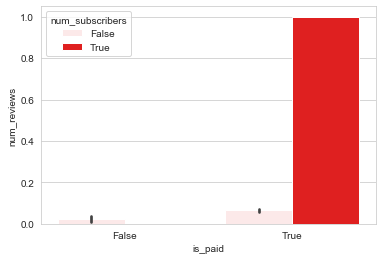

In [43]:
sns.barplot(df.is_paid,df.num_reviews==0,hue=df.num_subscribers==0,color='red')

Text(0.5, 1.0, 'Unsubscribed courses for each subject')

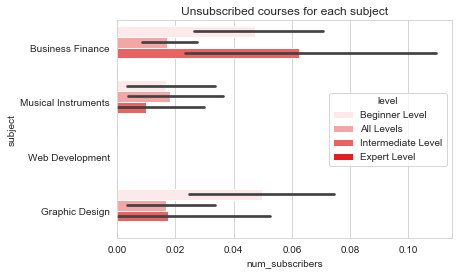

In [44]:
sns.barplot(df.num_subscribers==0,df.subject,hue=df.level,color='red')
plt.title('Unsubscribed courses for each subject')

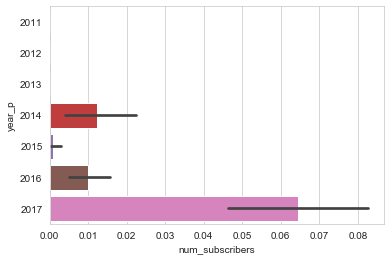

In [45]:
sns.barplot(df.num_subscribers==0,df.year_p)

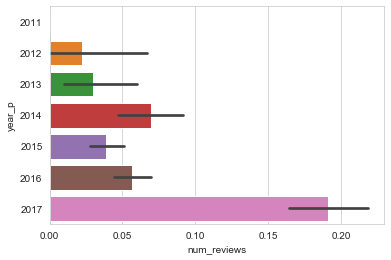

In [46]:
sns.barplot(df.num_reviews==0,df.year_p)

In [47]:
dff=df[df.num_subscribers==0]
dff.describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,65.000000,65.0,65.0,65.000000,65.000000
mean,46.846154,0.0,0.0,12.507692,1.467179
std,40.432904,0.0,0.0,7.632421,1.121089
min,20.000000,0.0,0.0,0.000000,0.000000
25%,20.000000,0.0,0.0,8.000000,0.616667
50%,25.000000,0.0,0.0,10.000000,1.000000
75%,50.000000,0.0,0.0,14.000000,2.000000
max,200.000000,0.0,0.0,35.000000,6.000000


In [48]:
df1=df[df.num_reviews==0]
df1.describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,284.000000,284.000000,284.0,284.000000,284.000000
mean,47.183099,70.588028,0.0,23.158451,2.405282
std,42.382512,307.212641,0.0,27.894037,3.260184
min,0.000000,0.000000,0.0,0.000000,0.000000
25%,20.000000,1.000000,0.0,9.000000,1.000000
50%,35.000000,4.000000,0.0,14.000000,1.500000
75%,50.000000,12.000000,0.0,27.000000,3.000000
max,200.000000,4259.000000,0.0,321.000000,31.500000


INSIGHTS:
1. We have 65 courses with 0 subscribers and 284 with no reviews.
2. Paid/Free Courses: All the unsubscribed courses are paid. 97.6% of unreviewed courses are paid.
3. The unsubscribed courses have no expert level courses.
4. Subject: There are no Web Development courses that have 0 subscribers. 
   Business Finance courses are the majority in both cases 
5. Published Year:  2017 has the majority (nearly 65%)of unsubscribed and unreviewed courses. 
   A possible reason could be because users might not have come across the newer courses.
6. There are no unsubscribed and unreviewed courses in 2011. There are no unsubscribed courses in 2011, 2012 and 2013.
7. From the data it can be inferred that Mean price of unsubscribed courses is $47 with a maximum of $200. 
The unsubscribed courses have a duration of approximately 1.5 hours with 12 lectures(approx)and maximum of 6hours.
The unreviewed courses have a duration of approx 2.5 hrs with max 31hrs.

# Coursera analysis (relating our insight on other dataset)

In [50]:
cou=pd.read_csv('courseradata.csv')
cou.info()
cou.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_id                 891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 48.9+ KB


,course_id,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)Â² Systems Security Certified Practitione...,(ISC)Â²,SPECIALIZATION,4.7,Beginner,5000
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


In [51]:
cou.groupby('course_difficulty')['course_students_enrolled'].sum()

course_difficulty
Advanced         1263000
Beginner        38390000
Intermediate    14490000
Mixed           17993000
Name: course_students_enrolled, dtype: int64

Hence our insight for beginner and mixed level comes out to be true.

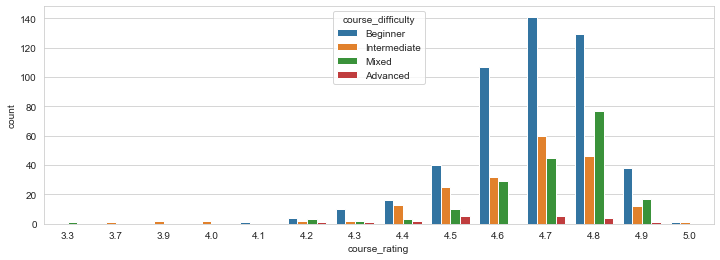

In [52]:
plt.figure(figsize = (12,4))
sns.countplot(data = cou, x = 'course_rating', hue = 'course_difficulty')
plt.show()

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

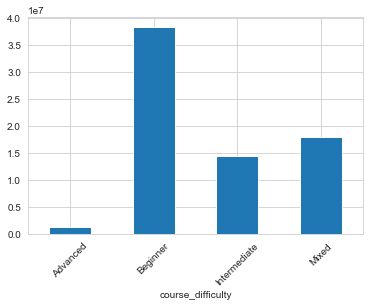

In [58]:
cou.groupby('course_difficulty')['course_students_enrolled'].sum().plot(kind= 'bar')
plt.xticks(rotation=45)